<a href="https://colab.research.google.com/github/Jacques-ds-ggg/deep-learning-projects/blob/main/Convolutional_Neural_Networks_(CNN)_Representation_in_a_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Recognizing hardwritten digits
_by JacquesDS_

In the project at hand, discovering the MNIST handwritten digit recognition problem with the development of a deep learning model in Python using the Keras library, in order to achieve excellent results.

> **Why deep learning ?** 
- Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.

> **Why use keras ?**
- Keras is one of the best neural network Frameworks currently around.

> **What is the MNIST handwritten digit recognition problem ?**
- The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset. Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. In this tutorial, we’ll give you a step by step walk-through of how to build a hand-written digit classifier using the MNIST dataset. For someone new to deep learning, this exercise is arguably the “Hello World” equivalent. It consists of 70,000 labeled 28x28 pixel grayscale images of hand-written digits. The dataset is split into 60,000 training images and 10,000 test images. There are 10 classes (one for each of the 10 digits). The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images.


In [1]:
import numpy as np                                            # import numpy to generate random numbers

np.random.seed(10)                                            # for reproducibility

## Exploring the Data

#### Load image data from MNIST.

In [2]:
from keras.datasets import mnist                              # import keras to obtain the dataset within the library
(X_train, y_train), (X_test, y_test) = mnist.load_data()      # load_data for splitting data to test & train datasets

print('There are %d training images.' % len(X_train))         # Display the test & train datasets lenth
print('There are %d testing images.' % len(X_test))
print('There are %d testing images.' % len(y_train))
print('There are %d testing images.' % len(y_test))

11493376/11490434 [==============================] - 0s 0us/step
There are 60000 training images.
There are 10000 testing images.
There are 60000 testing images.
There are 10000 testing images.


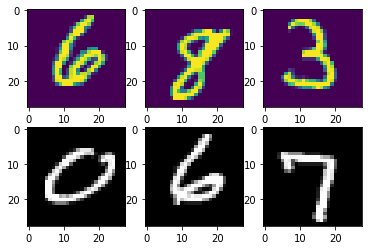

In [3]:
import matplotlib.pyplot as plt                               # import matplotlib for Charts

plt.subplot(231)                                              # plot some random images in (RGB) as well as gray scale format
plt.imshow(X_train[13])
plt.subplot(232)
plt.imshow(X_train[55])
plt.subplot(233)
plt.imshow(X_train[546])
plt.subplot(234)
plt.imshow(X_train[489], cmap=plt.get_cmap('gray'))           
plt.subplot(235)
plt.imshow(X_train[30023], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[24670], cmap=plt.get_cmap('gray'))
plt.show()                                                     # show the plot

In [4]:
print ('Shape of training dataset:')                          # printing shape of training dataset
print (X_train.shape)
print ('Shape of testing dataset:')                           # printing shape of testing dataset
print (X_test.shape)                                          # Shape required to determine hat type of preprocessing on the dimentions needs to be done

Shape of training dataset:
(60000, 28, 28)
Shape of testing dataset:
(10000, 28, 28)


## **Preprocessing Data**

### Reshaping Dimesions
Now we will preprocess the inputs for keras. Our input is structured as a 3d array in the form of (60000, 28, 28), this means the height and depth of image is 28x28 and 60000 is number of images in the dataset. But input in keras requires 4d array. We must add a dimension for the depth of image. A full-color image with all 3 RGB channels will have a depth of 3, but MNIST images only have a depth of 1 and we can add this dimension easily using the **reshape()** function on the NumPy array.

In [5]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)        # Reshape input data
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print('Dimensions after reshaping:')                          # Printing the new dimensions
print(X_train.shape)

Dimensions after reshaping:
(60000, 1, 28, 28)


### Normalize the Pixel values
Each of the pixels that represents an image stored inside a computer has a pixel value which describes how bright that pixel is, and/or what color it should be. In the simplest case of binary images, the pixel value is a 1-bit number indicating either foreground or background. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255 and this will normalize our data values to the range [0, 1].

In [6]:
X_train = X_train.astype('float32')                           # convert data type to float32
X_test = X_test.astype('float32')
X_train = X_train/255                                         # Normalizing pixel values
X_test = X_test/255

### Preprocess class labels for Keras
This is a multi-class classification problem. The output variable is an integer from 0 to 9. Currently our labels is an array containing 10 classes and we need the labels to be in 10 distinct classes. We can fix this easily by using one hot encoding. There is a built-in **np_utils.to_categorical()** helper function in Keras.

In [7]:
from keras.utils import np_utils                              # import the library needed for one hot encoding
Y_train = np_utils.to_categorical(y_train, 10)                # One Hot Encode labels
Y_test = np_utils.to_categorical(y_test, 10)

## **Define model architecture**

The Keras layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. Here, we will learn how to use layers to build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.
### **About CNN**
Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. Our aim of introducing more and more layers is increasing the depth of image and decreasing the height and depth of the image. More the depth, more patterns the model will learn within the image. 

In [8]:
from keras.models import Sequential                                                                     # import necessary libraries for defining model architecture
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')

model = Sequential()                                                                                    # Define model architecture
 
model.add(Convolution2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 11, 11)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## Compile and Fit the Model

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])        # Compile model
model.fit(X_train, Y_train, batch_size=200, epochs=2, verbose=1)                            # Fit model on training data

Epoch 1/2
300/300 [==============================] - 33s 11ms/step - loss: 0.7827 - accuracy: 0.7416
Epoch 2/2
300/300 [==============================] - 3s 11ms/step - loss: 0.1291 - accuracy: 0.9615


## Evaluate model on test data

In [11]:
from keras.layers import UpSampling2D

score = model.evaluate(X_test, Y_test, verbose=0)                                           # Evaluate model on test data
print ('The error rate and Accuracy on test set is as follows : ')
print (score)
print(UpSampling2D(size=(2, 2), data_format=None))

The error rate and Accuracy on test set is as follows : 
[0.04678431525826454, 0.9857000112533569]
